In [23]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('groceries.csv',sep='\t', header= None)
 
dataset = dataset.replace(np.nan, '', regex=True)
dataset

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [27]:
dataset
transactions = []
for i in range(0, 9835):
    transactions.append([str(dataset.values[i,u]) for u in range(0,1)]) 

In [28]:
groceries_series  = pd.DataFrame(pd.Series(transactions))
groceries_series 
groceries_series.columns = ["groceries"]
groceries_series

,groceries
0,"[citrus fruit,semi-finished bread,margarine,re..."
1,"[tropical fruit,yogurt,coffee]"
2,[whole milk]
3,"[pip fruit,yogurt,cream cheese ,meat spreads]"
4,"[other vegetables,whole milk,condensed milk,lo..."
...,...
9830,"[sausage,chicken,beef,hamburger meat,citrus fr..."
9831,[cooking chocolate]
9832,"[chicken,citrus fruit,other vegetables,butter,..."
9833,"[semi-finished bread,bottled water,soda,bottle..."


In [30]:
X = groceries_series['groceries'].str.join(sep=',').str.get_dummies(sep=',')
X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(whole milk, yogurt, soda)"
985,0.007931,"(whole milk, tropical fruit, whipped/sour cream)"
986,0.006202,"(yogurt, tropical fruit, whipped/sour cream)"
987,0.015150,"(whole milk, tropical fruit, yogurt)"


In [32]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of       support                                  itemsets
117  0.255516                              (whole milk)
73   0.193493                        (other vegetables)
88   0.183935                              (rolls/buns)
98   0.174377                                    (soda)
118  0.139502                                  (yogurt)
..        ...                                       ...
874  0.005084  (whole milk, newspapers, tropical fruit)
276  0.005084                 (chewing gum, whole milk)
332  0.005084                     (frankfurter, coffee)
346  0.005084                     (curd, cream cheese )
271  0.005084           (canned fish, other vegetables)

[989 rows x 2 columns]>

In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2559,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2022,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2019,"(other vegetables, butter)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
1313,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2041,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2044,(onions),"(other vegetables, root vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
2205,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
2204,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831


In [38]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(whole milk, yogurt, soda)"
985,0.007931,"(whole milk, tropical fruit, whipped/sour cream)"
986,0.006202,"(yogurt, tropical fruit, whipped/sour cream)"
987,0.015150,"(whole milk, tropical fruit, yogurt)"


In [35]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of       support                    itemsets
86   0.255516                (whole milk)
55   0.193493          (other vegetables)
66   0.183935                (rolls/buns)
75   0.174377                      (soda)
87   0.139502                    (yogurt)
..        ...                         ...
178  0.010066      (frankfurter, sausage)
306  0.010066  (whole milk, yogurt, curd)
160  0.010066          (rolls/buns, curd)
212  0.010066   (tropical fruit, napkins)
199  0.010066   (whole milk, hard cheese)

[333 rows x 2 columns]>

In [39]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
658,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
659,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
1418,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1415,"(other vegetables, butter)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
690,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
691,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2043,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2046,(onions),"(other vegetables, root vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
1549,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
1548,"(citrus fruit, pip fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831


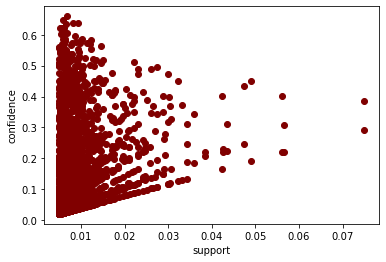

In [40]:
#visualization for rule1
import matplotlib.pyplot as plt
plt.scatter('support', 'confidence',data = rules2,color ='maroon')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()